In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
x=linspace(0.3,1.5,100)

In [3]:
def V0(x,D,re,a):
    V0=D*(1-exp(-a*(x-re)))**2
    return V0

In [4]:
D=0.15
re=0.64
a=6.5

In [5]:
def VHO(x,k,re,E0):
    VHO=0.5*k*(x-re)**2+E0
    return VHO

In [6]:
ka=6
rea=0.55
E0a=0.3
kb=40
reb=1
E0b=0.55

In [7]:
gamma=0.75

In [8]:
def V1(x,ka,rea,E0a,kb,reb,E0b,gamma):
    VHOa=0.5*ka*(x-rea)**2+E0a
    VHOb=0.5*kb*(x-reb)**2+E0b
    V1=0.5*(VHOa+VHOb)-0.5*sqrt((VHOa-VHOb)**2+2*gamma**2)
    return V1

In [9]:
from qdyn import propagator, animate_dynamics

In [10]:
from numpy.polynomial.hermite import hermval

def eigen_ho(x,v,m,k,r):
    """Calculates the eigenfunction of the harmonic oscillator system.
    
    Arguments
    x: is a space coordinate.
    v: is the vibrational quantum number.
    m: is the mas of the system.
    k: is the force constant of the harmonic potential.
    """
    
    hermite_sum=zeros(v+1)
    hermite_sum[-1]=1
    return 1/(2**v * math.factorial(v))**0.5 * (((m*k)**0.5)/pi)**0.25 * np.e**(-(x-r)**2 * ((m*k)**0.5)/2) * hermval((m*k)**0.25 * (x-r),hermite_sum) 

In [11]:
def LC(x,c0,c1,v,m,k):
    lc=c0*eigen_ho(x,v,m,k)+c1*eigen_ho(x,v,m,k)
    return lc

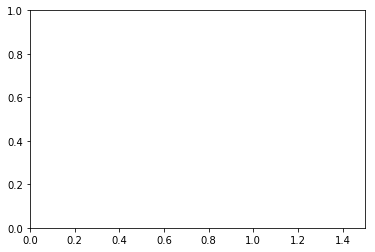

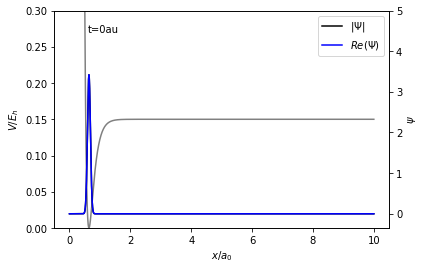

In [12]:
x=linspace(0,10,100000)
dt=10
x0=0
v=0
m=14583
k=2*D*a**2
r=0.64
psi0=eigen_ho(x,x0,m,k,r)

# Add the initial wavefunction to the array with the wavefunction evolution
wf_dynamics=array([psi0])

for steps in range(100): # How many time steps/how many times to apply the propagator
    psi=propagator(x,wf_dynamics[-1],m,dt,V0,D,re,a) # Apply the propagator to the last element in the array
    wf_dynamics=append(wf_dynamics,[psi],axis=0) # Add the new wavefunction to the array
animate_dynamics(x,wf_dynamics,dt,V0(x,D,re,a), xlim(0,1.5),V_ylim=(0,0.3),psi_ylim=(-0.35,5))

In [13]:
from numpy import trapz

In [14]:
def auto(prop_wf,x):
    auto=conj(prop_wf[0])*prop_wf
    return trapz(auto,x)

c:\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


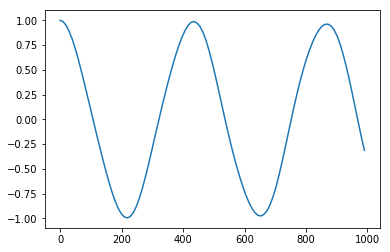

In [15]:
t=linspace(0,dt*steps,101)
plot(t,auto(wf_dynamics,x))

In [16]:
import pickle

In [17]:
pickle.dump(wf_dynamics, open('gs data','wb'))

In [18]:
from numpy.fft import fft,ifft,fftshift,ifftshift,fftfreq

In [19]:
t_gs=linspace(0,dt*steps,len(auto(wf_dynamics,x)))
omega_gs=fftshift(ifft(auto(wf_dynamics,x),norm='ortho'))
freq_gs=fftshift(fftfreq(len(t_gs),d=dt))

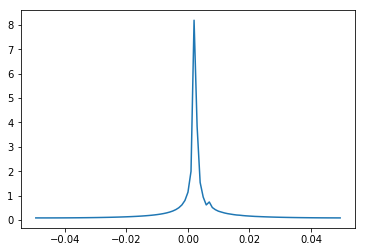

In [20]:
plot(freq_gs,abs(omega_gs))

In [ ]:
x=linspace(0,10,100000)
dt=30
x0=0
v=0
m=14583
k=2*D*a**2
r=0.64
psi0=eigen_ho(x,x0,m,k,r)

# Add the initial wavefunction to the array with the wavefunction evolution
wf_dynamics=array([psi0])

for steps in range(1000): # How many time steps/how many times to apply the propagator
    psi=propagator(x,wf_dynamics[-1],m,dt,V1,ka,rea,E0a,kb,reb,E0b,gamma) # Apply the propagator to the last element in the array
    wf_dynamics=append(wf_dynamics,[psi],axis=0) # Add the new wavefunction to the array
animate_dynamics(x,wf_dynamics,dt,V1(x,ka,rea,E0a,kb,reb,E0b,gamma), xlim(0,1.5),V_ylim=(0.15,0.3),psi_ylim=(-0.35,5))

In [ ]:
excited=auto(wf_dynamics,x)
t=linspace(0,dt*steps,1001)
plot(t,excited)

In [ ]:
pickle.dump(wf_dynamics, open('excited data2','wb'))

In [ ]:
t_excited=linspace(0,dt*steps,len(excited))
omega_excited=fftshift(ifft(excited,norm='ortho'))
freq_excited=fftshift(fftfreq(len(t_excited),d=dt))

In [ ]:
plot(freq_excited,abs(omega_excited))
xlim(0.03,0.05)